<hr>
<p style="text-align:left;">
    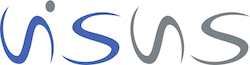
    <span style="float:right;">
        University of Stuttgart<br />Visualization Research Center
    </span>
</p>
<hr>
<p style="text-align:left;">
    <span style="float:left;">
        Prof. Daniel Weiskopf
    </span>
    <span style="float:right;">
        Sunday, 2024-12-08
    </span>
</p>
<br/>

# Theoretical and Methodological Foundations of Visual Computing
## Assignment 08
Responsible tutor: Daniel Klötzl
<br/>

> *Please submit your solution to ILIAS by <b>Sunday, 2024-12-15, 23:55</b>. <br /> Solutions will be discussed in the tutorial on <b>Thursday, 2024-12-19</b>.* <br /> *Please note that source code will only be accepted if it compiles.*
<hr>

**Student name(s):** <font color='green'>Guangxin Zhao</font> <br />
**Immatriculation number(s):** <font color='green'>st194136</font> <br />

<hr>

### Exercise 8.1 (6 points)
Given a grid with nodes $x_i=i\cdot\Delta x$, $y_j=j\cdot\Delta y$ with $\Delta x = \Delta y = 2$ and $i,j \in \{0,1,2,3\}$. The corresponding scalar values are shown in the following Figure.

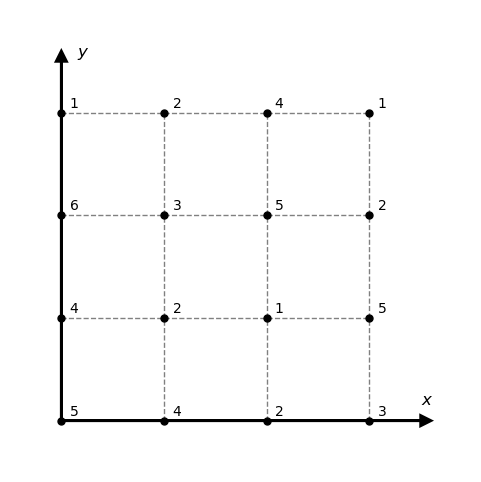

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim(-1, 8)
ax.set_ylim(-1, 8)

ax.text(7, 0.25, '$x$', fontsize=12, va='bottom')
ax.text(0.3, 7.3, '$y$', fontsize=12, va='top')

# Given coordinate values
x_coords = [0, 2, 4, 6]
y_coords = [0, 2, 4, 6]
values = np.array([
    [5, 4, 2, 3],
    [4, 2, 1, 5],
    [6, 3, 5, 2],
    [1, 2, 4, 1],
])

for x in x_coords[1:]:
    ax.plot([x, x], [y_coords[0], y_coords[-1]], color='gray', linestyle='--', linewidth=1)
for y in y_coords[1:]:
    ax.plot([x_coords[0], x_coords[-1]], [y, y], color='gray', linestyle='--', linewidth=1)
ax.set_aspect('equal', adjustable='box')
for i, x in enumerate(x_coords):
    for j, y in enumerate(y_coords):
        # Draw the points
        ax.plot(x, y, 'o', color='black', markersize=5)
        # Annotate the values
        ax.text(x + 0.15, y+0.1, f'${values[j, i]}$', fontsize=10)

ax.arrow(0, 0, 7, 0, head_width=0.2, head_length=0.2, fc='black', ec='black', linewidth=2)
ax.arrow(0, 0, 0, 7, head_width=0.2, head_length=0.2, fc='black', ec='black', linewidth=2)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.show()



`(a)` Write a Python script that does bilinear and bicubic interpolation on the domain $$\{ (x,y) \in \mathbb{R}^2 \, | \, 0 \leq x \leq 3,  0 \leq y \leq 3\}.$$ In case of bicubic interpolation, compute the derivatives using finite differences (central)  and use mirror padding at the boundaries. 

Plot your results using a suitable color map.

In [ ]:
x_values = np.linspace(0, 3, 1000)
y_values = np.linspace(0, 3, 1000)

X, Y = np.meshgrid(x_values, y_values)

def bilinear_interpolation(x, y, values):
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1
    return (values[y0, x0] * (x1 - x) * (y1 - y) +
            values[y0, x1] * (x - x0) * (y1 - y) +
            values[y1, x0] * (x1 - x) * (y - y0) +
            values[y1, x1] * (x - x0) * (y - y0))

def mirror_pading(values):
    return np.pad(values, 1, mode='reflect')

def bicubic_interpolation(x, y, values):
    x0 = int(x)
    x1 = x0 + 1
    y0 = int(y)
    y1 = y0 + 1

bicubic_values = mirror_pading(values)


[[2 4 2 1 5 1]
 [4 5 4 2 3 2]
 [2 4 2 1 5 1]
 [3 6 3 5 2 5]
 [2 1 2 4 1 4]
 [3 6 3 5 2 5]]


<hr>

### Exercise 8.2 (8 points)

Given the three functions: 
\begin{align*}
    &\text{Runge function}  &f(x) &= \frac{1}{1+x^2} & \text{with } &x\in[-5,5], \\
    &\text{Sine function}  &g(x) &= \sin(x) & \text{with } &x\in[0,2\,\pi], \\
    &\text{Lennard-Jones function} &h(x) &= x^{-12} - x^{-6} & \text{with } &x\in[1,5].
\end{align*}


`(a)` Implement Newton interpolation in Python to reconstruct each function out of $N$ equidistant sample points, where $N \in \{5,10,15\}$. Provide a plot for each function showing the reconstructed function versus the analytical solution. Comment on the result. 

In [69]:
# YOUR CODE HERE

`(b)` To improve the interpolation results, [**Chebyshev polynomials**](https://en.wikipedia.org/wiki/Chebyshev\_polynomials) can be used to obtain a better approximation of the sample points positions:
\begin{equation*}
	x_\text{k} = \frac{a+b}{2} + \frac{b-a}{2} \cdot\text{cos}\left( \frac{2\cdot k + 1}{2\,n} \cdot\pi \right) \quad \text{with} \quad k = 0, 1, ..., n-1.
\end{equation*}
Extend the implementation to generate the sample points using Chebyshev polynomials, where $a$ and $b$ are the boundaries of the function interval. Compare the results against `(a)`. 	

In [70]:
# YOUR CODE HERE

<hr>

### Exercise 8.3 (6 points)

Given a set of sample points $S=\{\vec{q_i} \in \Omega,i=1…4\}, \Omega\subset{\mathbb{R}}^2$.

`(a)` Roughly sketch the Voronoi decomposition and shade the regions accordingly. Based on this, construct the Delaunay triangulation from the Voronoi decomposition.

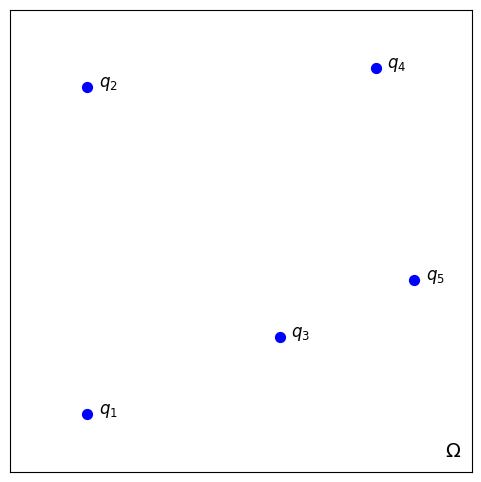

In [71]:
import matplotlib.pyplot as plt
import numpy as np

x = (1,1,6,8.5,9.5)
y= (.5,9,2.5,9.5,4)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, color='blue', s=50, label='Random Points')

for i, (xi, yi) in enumerate(zip(x, y)):
    ax.text(xi + 0.3, yi, f'$q_{{{i+1}}}$', fontsize=12, color='black')

ax.text(10.5, -0.6, r'$\Omega$', fontsize=14, ha='center')

ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.set_aspect('equal', adjustable='box')

ax.set_xticks([])
ax.set_yticks([])

plt.show()

<font color='green'>Cell left blank for student response</font>



`(b)` Given the following triangulations of a set of sample points, which of the triangulations is a Delaunay triangulation? Provide a short explanation.
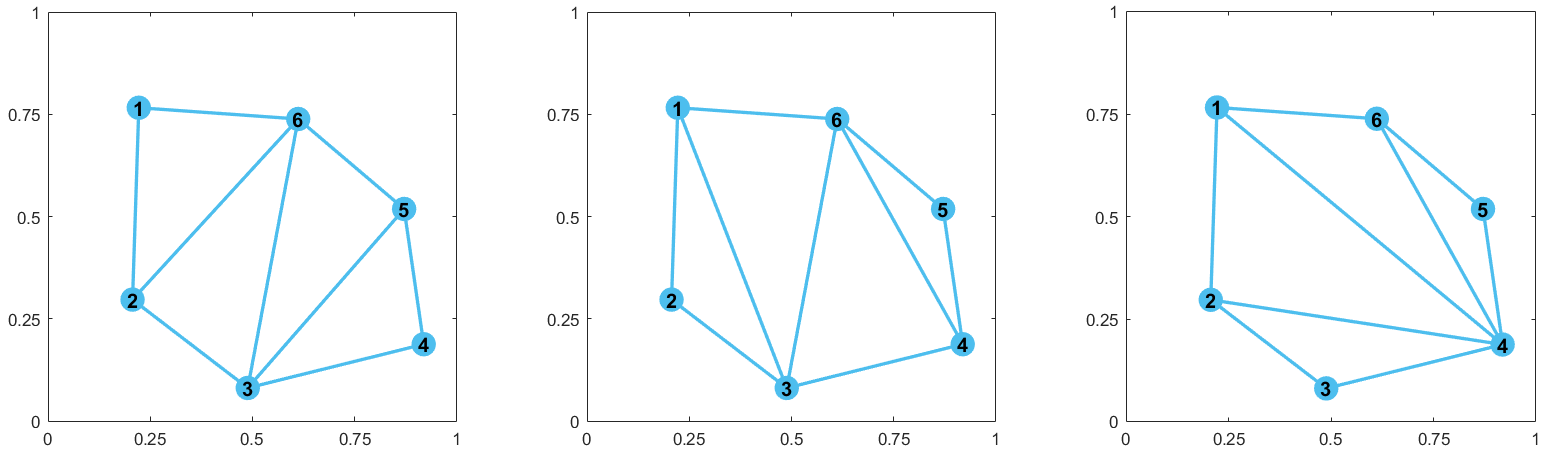


<font color='green'>Cell left blank for student response</font>



<hr>

### Bonus-Exercise 8.4 (4 points)

Given $P_i(x,y,d)$ with $i \in \{1,2,3,4,5,6\}$ in the Figure below, interpolate the points $P_7$ and $P_8$ via **Shepard interpolation** considering neighbors within radius 3 and using exponent $p=2$ in the basis functions. For each interpolation specify the distances to all considered points and provide the evaluated basis functions.

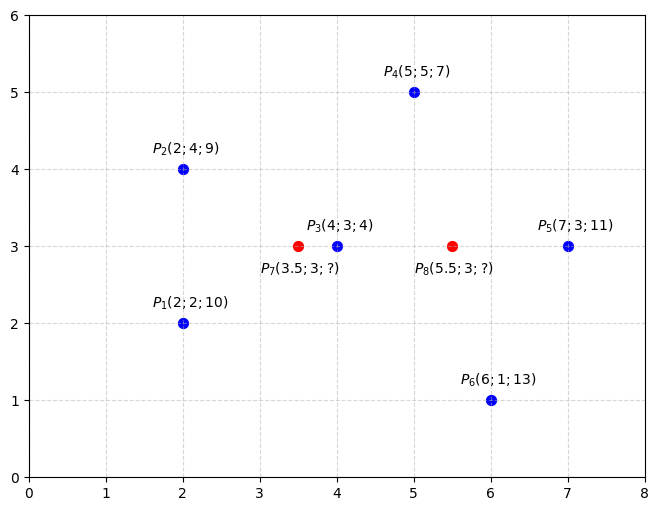

In [72]:
import matplotlib.pyplot as plt

# Points from the plot
points = {
    "P_1(2;2;10)": (2, 2, 10),
    "P_2(2;4;9)": (2, 4, 9),
    "P_3(4;3;4)": (4, 3, 4),
    "P_4(5;5;7)": (5, 5, 7),
    "P_5(7;3;11)": (7, 3, 11),
    "P_6(6;1;13)": (6, 1, 13),
    "P_7(3.5;3;?)": (3.5, 3, None),  # Value unknown
    "P_8(5.5;3;?)": (5.5, 3, None),  # Value unknown
}

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

for label, (x, y, value) in points.items():
    # Annotate the point
    annotation = f"${label}$"
    if value is None:
        ax.scatter(x, y, color="red", s=50)
        ax.text(x - 0.5, y - 0.35, annotation, fontsize=10)
    else:
        ax.scatter(x, y, color="blue", s=50)
        ax.text(x - 0.4, y + 0.2, annotation, fontsize=10)
    

ax.grid(visible=True, linestyle="--", alpha=0.5)
ax.set_xlim(0, 8)
ax.set_ylim(0, 6)
ax.set_xticks(range(9))
ax.set_yticks(range(7))
ax.set_aspect('equal', adjustable='box')

plt.show()

<hr>

<div class="alert alert-success">

### Guidelines for Submission

Do not forget to update the student name(s) and matriculation number(s). 

**Text-based Responses**

For text-based questions, a markdown cell with the placeholder `Cell left blank for student response` will usually follow the question. Ensure that text responses are either entered in markdown cells using plain text and LaTeX or via the import of PDFs or PNG files (e.g. via `![ExampleFileName](example_file.png)` for handwritten solutions). If external files are used in your Jupyter Notebook, make sure to include all data in a zipped folder uploaded to Ilias.

**Code-based Responses**

For questions that involve Python coding, you'll typically find a code cell with the placeholder `# YOUR CODE HERE`.

#### Submission Process

To ensure your notebook runs smoothly from start to finish, select "Restart & Run All" from the "Kernel" menu before submitting.

When ready to submit, upload your `.ipynb` file (or a zipped folder containing the `.ipynb` file as well as all auxiliary files, e.g. imported .pdf or .jpg files) to Ilias.

</div>